### Gas Prices Brazil

#### Libraries

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from colour import Color

#### Dataset

In [2]:
data = pd.read_csv('gas_prices_brazil.tsv', sep="\t")
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


#### Data treatment

In [35]:
# Before treatment
data['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [36]:
def s10_diesel_oil_treatment(row):
  '''
  Once there are products interpreted as different ones because of accent, like OLEO DIESEL and ÓLEO DIESEL,
  this function change the product names with accent, standardizing and joining them as an unique label
  '''
  if row['PRODUTO'] in ['ÓLEO DIESEL S10', 'OLEO DIESEL S10']:
    row['PRODUTO'] = 'OLEO DIESEL S10'
  elif row['PRODUTO'] in ['ÓLEO DIESEL', 'OLEO DIESEL']:
   row['PRODUTO'] = 'OLEO DIESEL' 
  return row

In [37]:
data = data.apply(s10_diesel_oil_treatment, axis=1)

In [44]:
# After treatment
data['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'OLEO DIESEL',
       'OLEO DIESEL S10', 'GASOLINA ADITIVADA'], dtype=object)

#### Exploratory Data Analytics

##### Quantity of ocurrencies per product and average resale price per product

In [45]:
# Selecting quantity of each product
products_counts = data['PRODUTO'].value_counts().to_frame().sort_values(by='PRODUTO')
# Selecting average resale prices per product 
products_prices = data.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].mean().to_frame().sort_values(by='PREÇO MÉDIO REVENDA')
# Ordering by products_counts index
products_prices = products_prices.loc[products_counts.index]

In [46]:
products_counts.index.unique()

Index(['GASOLINA ADITIVADA', 'OLEO DIESEL S10', 'GNV', 'ETANOL HIDRATADO',
       'OLEO DIESEL', 'GLP', 'GASOLINA COMUM'],
      dtype='object')

In [47]:
english_products_name = ['GASOLINE WITH ADDITIVES', 'S10 DIESEL OIL', 'NGV', 'HYDRATED ETHANOL',
       'DIESEL OIL', 'LPG', 'REGULAR GASOLINE']

C:\Users\cliente\AppData\Local\Temp/ipykernel_14900/647186325.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(english_products_name, rotation = -45, fontdict={'horizontalalignment':'center'})
C:\Users\cliente\AppData\Local\Temp/ipykernel_14900/647186325.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(english_products_name, rotation = -45, fontdict={'horizontalalignment':'center'})


Text(0, 0.5, 'Avareage resale price (R$)')

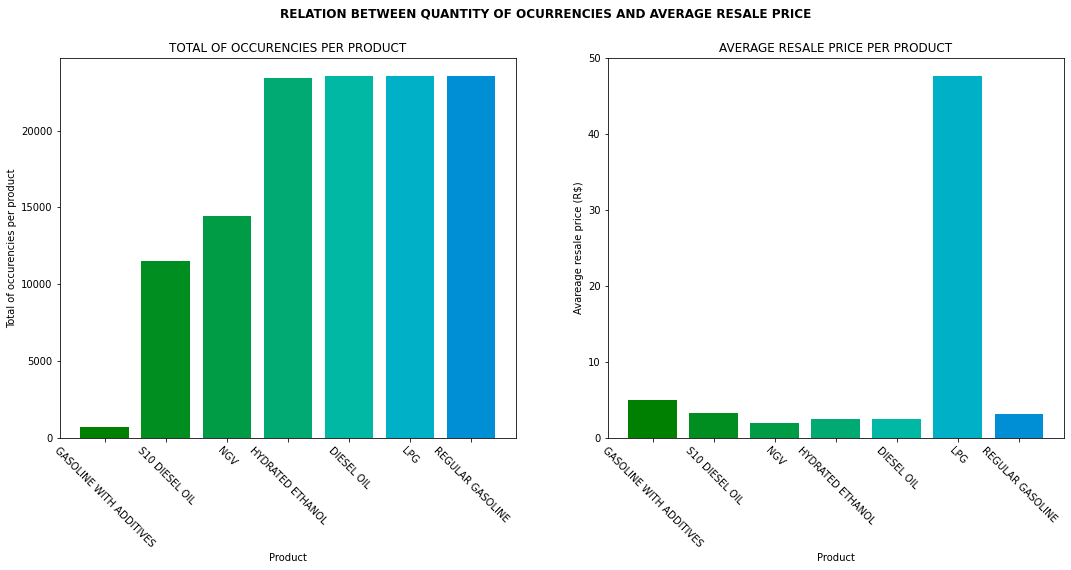

In [59]:
# Creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2,figsize=(18,7))
fig.suptitle('RELATION BETWEEN QUANTITY OF OCURRENCIES AND AVERAGE RESALE PRICE', fontweight='bold')

# Determing color gradient
colors = list(Color('green').range_to(Color('blue'),10))
colors = [color.rgb for color in colors]

# Product quantities bars
product_counts_bar = ax_1.bar(products_counts.index, products_counts['PRODUTO'], color=colors)
ax_1.set_xticklabels(english_products_name, rotation = -45, fontdict={'horizontalalignment':'center'})

# Product prices bars
avg_price_bar = ax_2.bar(products_prices.index, products_prices['PREÇO MÉDIO REVENDA'], color=colors)
ax_2.set_xticklabels(english_products_name, rotation = -45, fontdict={'horizontalalignment':'center'})

# Personalizing ax_1
ax_1.set_title('TOTAL OF OCCURENCIES PER PRODUCT')
ax_1.set_xlabel('Product')
ax_1.set_ylabel('Total of occurencies per product')

# Personalizing ax_2
ax_2.set_title('AVERAGE RESALE PRICE PER PRODUCT')
ax_2.set_xlabel('Product')
ax_2.set_ylabel('Avareage resale price (R$)')

##### Average Resale Price of Ethanol and Gasoline per Region

In [3]:
# Selecting ethanol and gasoline rows
df_gasoline = data[data.loc[:, 'PRODUTO']=='GASOLINA COMUM'].copy()
df_ethanol= data[data.loc[:, 'PRODUTO']=='ETANOL HIDRATADO'].copy()

In [4]:
# Grouping gasoline dataframe per region, product and end date
df_gasoline['DATA FINAL']= pd.to_datetime(df_gasoline['DATA FINAL'])
df_group_gasoline = df_gasoline.groupby(['REGIÃO', 'DATA FINAL'])['PREÇO MÉDIO REVENDA'].mean()\
.to_frame().reset_index()

In [5]:
# Grouping ethanol dataframe per region, product and end date
df_ethanol['DATA FINAL']= pd.to_datetime(df_ethanol['DATA FINAL'])
df_group_etanol = df_ethanol.groupby(['REGIÃO', 'DATA FINAL'])['PREÇO MÉDIO REVENDA'].mean()\
.to_frame().reset_index()

In [6]:
def separate_df(df:pd.DataFrame):
    ''' 
    This function separate the dataframes by regions, inserting all
    new dataframes into a dictionary called all_regions
    '''
    all_regions = {}
    for region in df['REGIÃO'].unique():
        all_regions[region] = pd.DataFrame(df[df['REGIÃO']==region])
    return all_regions

In [13]:
gasoline_all_regions = separate_df(df=df_group_gasoline)
etanol_all_regions = separate_df(df=df_group_etanol)
regions_names = ['MIDWEST', 'NORTHEAST', 'NORTH', 'SOUTHEAST', 'SOUTH']

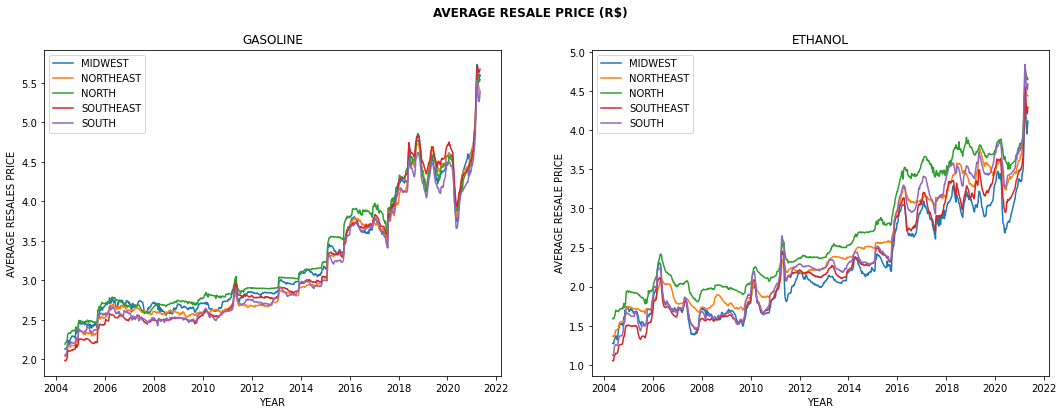

In [14]:
# Figure and axes
fig,(ax_1,ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

# Figure Title
fig.suptitle('AVERAGE RESALE PRICE (R$)', fontweight = 'bold')

# Plotting dataframes of all regions
for key in gasoline_all_regions.keys():
  ax_1.plot('DATA FINAL', 'PREÇO MÉDIO REVENDA', data=gasoline_all_regions[key])
  ax_2.plot('DATA FINAL', 'PREÇO MÉDIO REVENDA', data=etanol_all_regions[key])

# Personalizing the plot
ax_1.set_title('GASOLINE')
ax_1.set_xlabel('YEAR')
ax_1.set_ylabel('AVERAGE RESALES PRICE')
ax_1.legend(regions_names)

# Personalizando o segundo ax
ax_2.set_title('ETHANOL')
ax_2.set_xlabel('YEAR')
ax_2.set_ylabel('AVERAGE RESALE PRICE')
ax_2.legend(regions_names)

#### Average Resale Price of Ethanol and Gasoline per Region in 2020

In [9]:
# Selecting ethanol and gasoline rows
gas_et = data[data['PRODUTO'].isin(['ETANOL HIDRATADO','GASOLINA COMUM'])].copy()
# Creating Year column
gas_et['ANO'] = pd.to_datetime(gas_et['DATA FINAL']).dt.year
# Selecting rows of 2020
gas_et_2020 = gas_et[gas_et['ANO']==2020]
# Grouping by product and region
group_gas_et = gas_et_2020.groupby(['PRODUTO','REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().to_frame()
# Dataframe transposition
group_gas_et = group_gas_et.T

In [10]:
group_gas_et

PRODUTO             ETANOL HIDRATADO                                          \
REGIÃO                  CENTRO OESTE  NORDESTE     NORTE   SUDESTE       SUL   
PREÇO MÉDIO REVENDA         3.105278  3.459086  3.701839  3.314773  3.587523   

PRODUTO             GASOLINA COMUM                                         
REGIÃO                CENTRO OESTE  NORDESTE     NORTE   SUDESTE      SUL  
PREÇO MÉDIO REVENDA       4.310813  4.323689  4.271308  4.376097  4.17628

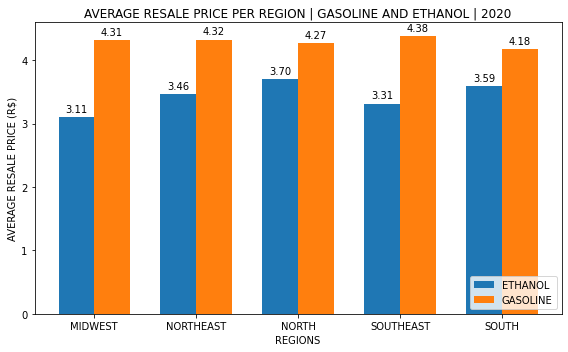

In [16]:
# Determining bar width
width = 0.35

# Determining bar location
x = np.arange(len(group_gas_et['ETANOL HIDRATADO'].columns))

# Getting prices
ethanol = group_gas_et.loc['PREÇO MÉDIO REVENDA','ETANOL HIDRATADO', ].values
gasoline = group_gas_et.loc['PREÇO MÉDIO REVENDA','GASOLINA COMUM', ].values

# Plot
fig, ax = plt.subplots(figsize=(8,5))
et = ax.bar(x - width/2, ethanol, width, label='ETHANOL')
gas = ax.bar(x + width/2, gasoline, width, label='GASOLINE')

# Personalizing
ax.bar_label(et, padding = 3, fmt = '%.2f')
ax.bar_label(gas, padding = 3, fmt = '%.2f')
ax.set_ylabel('AVERAGE RESALE PRICE (R$)')
ax.set_xlabel('REGIONS')
ax.set_xticks(x, regions_names)
ax.set_title('AVERAGE RESALE PRICE PER REGION | GASOLINE AND ETHANOL | 2020')
ax.legend(loc = 'lower right')
fig.tight_layout()


#### Number of Gas Stations per Federal States

Text(0.5, 1.0, 'NUMBER OF GAS STATIONS PER FEDERAL STATES')

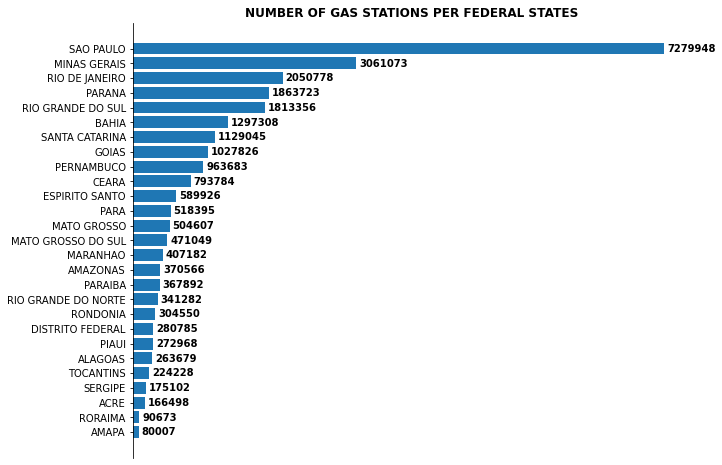

In [25]:
# Grouping per federal states
stations = data.groupby('ESTADO')['NÚMERO DE POSTOS PESQUISADOS'].sum()\
.sort_values(ascending=True).to_frame()

# Creating figure and axes
fig, ax = plt.subplots(figsize=(10,8))

# Bars
stations_barh = ax.barh(stations.index, stations['NÚMERO DE POSTOS PESQUISADOS'])

# Personalizing 
ax.bar_label(stations_barh, padding = 3, fmt = '%.f', fontweight = 'bold')
for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_visible(False)
ax.set_title('NUMBER OF GAS STATIONS PER FEDERAL STATES', fontweight = 'bold')

#### Relation between Gasoline and Ethanol Prices 

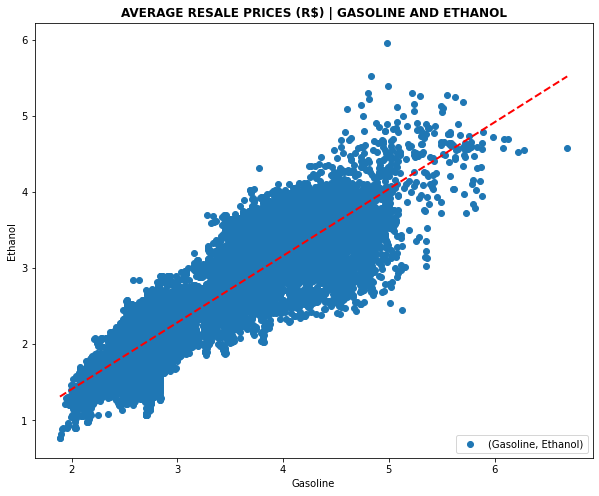

In [28]:
# Selecting average resale prices of gasoline and ethanol
gasoline_prices = data[data['PRODUTO']=='GASOLINA COMUM']['PREÇO MÉDIO REVENDA'].values[0:23440] # Slicing because the number of gasoline rows was bigger than the ethanol one
ethanol_prices = data[data['PRODUTO']=='ETANOL HIDRATADO']['PREÇO MÉDIO REVENDA'].values

# Creating figure and axes
fig, ax = plt.subplots(figsize=(10,8))

# Scatter
ax.scatter(gasoline_prices, ethanol_prices)

# Trend line
reg = linear_model.LinearRegression()
reg.fit(gasoline_prices.reshape(-1, 1), ethanol_prices.reshape(-1, 1))
pred_space = np.linspace(min(gasoline_prices), max(gasoline_prices)).reshape(-1,1)

# Plot
ax.plot(pred_space, reg.predict(pred_space), color = 'red', linewidth=2, linestyle='--')

# Personalizing
ax.set_title('AVERAGE RESALE PRICES (R$) | GASOLINE AND ETHANOL', fontweight='bold')
ax.set_xlabel('Gasoline')
ax.set_ylabel('Ethanol')
ax.legend(['(Gasoline, Ethanol)'],loc = 'lower right')